In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

**Problem Statement:** 

Predict delivery time using sorting time 

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

**Step 1: Importing data**

In [ ]:
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


**Step 2: Performing EDA On Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [ ]:
df[df.duplicated()].shape

(0, 2)

In [ ]:
df[df.duplicated()]

,Delivery Time,Sorting Time


In [ ]:
#renaming the col name since space is thr
df.rename(columns={'Delivery Time':'deliverytime','Sorting Time':'sortingtime'}, inplace = True)


**Step 3: Plotting the data to check for outliers**

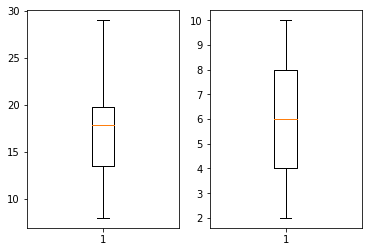

In [ ]:
plt.subplot(121)
plt.boxplot(df['deliverytime'])

plt.subplot(122)
plt.boxplot(df['sortingtime'])
plt.show()

Note: As we can see there are no Outliers in the data

**Step 4: Checking the Correlation between variables**

In [ ]:
df.corr()

,deliverytime,sortingtime
deliverytime,1.000000,0.825997
sortingtime,0.825997,1.000000


**Visualization of Correlation beteen x and y**


<AxesSubplot:xlabel='sortingtime', ylabel='deliverytime'>

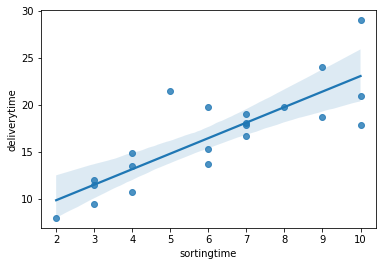

In [ ]:
sns.regplot(x=df['sortingtime'],y=df['deliverytime'])  

As you can see above


*   There is good correlation between the two variable.
*   The score is more than 0.8 which is a good sign




**Step 5: Checking for linearity in data**

Text(0, 0.5, 'Delivery Time')

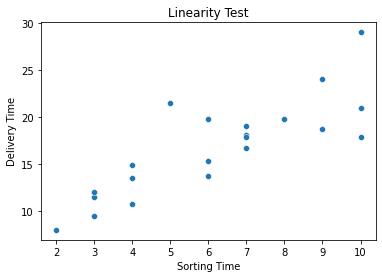

In [ ]:
sns.scatterplot(x = 'sortingtime', y = 'deliverytime', data =df)
plt.title('Linearity Test')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [ ]:
df.var()

deliverytime    25.754619
sortingtime      6.461905
dtype: float64

As you can see in above graph

*   It shows as the Sorting Time Increases Delivery Time also increases with much variation along the way

*   The data doesn't have any specific pattern in the variation, but variation is not constant so we can't say the variation is homoscedasticity.

**Step 6: Feature Engineering**

Trying different transformation of data to estimate normal distribution and to remove any skewness





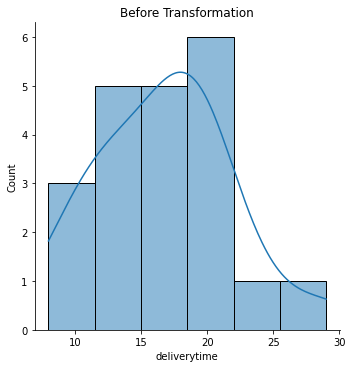

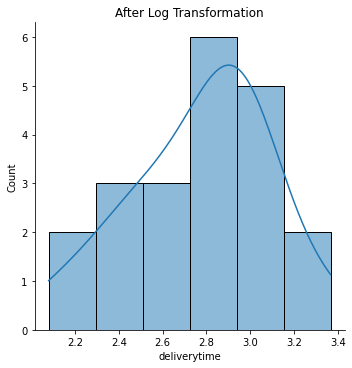

In [ ]:
sns.displot(df['deliverytime'], bins = 6, kde = True)          #displot for showing edges & and getting two plot seperately
plt.title('Before Transformation')                             #distplot for not showing edges & and getting plot together
sns.displot(np.log(df['deliverytime']), bins = 6, kde =True)
plt.title('After Log Transformation')
plt.show()

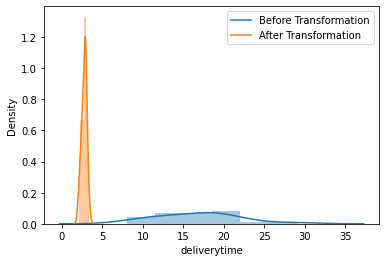

In [ ]:
sns.distplot(df['deliverytime'], bins = 6, kde = True) 
sns.distplot(np.log(df['deliverytime']), bins = 6, kde =True)
plt.legend(['Before Transformation', 'After Transformation'])


In [ ]:
df.skew()

deliverytime    0.352390
sortingtime     0.047115
dtype: float64

In [ ]:
a = np.log(df['deliverytime'])
a.skew()

-0.4512901148522999

As you can see

*   How log transformation affects the data and it scales the values down. Also how the skewness has reduced.


*   Before prediction it is necessary to reverse scale the values, even for calculating RMSE for the models.(Errors)




**Step 7 : QQ PLot to check the distrubution in different distribution**

We only Perform any data transformation when the data is skewed or not normal

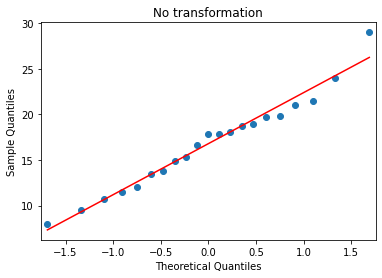

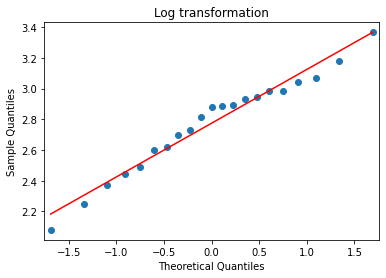

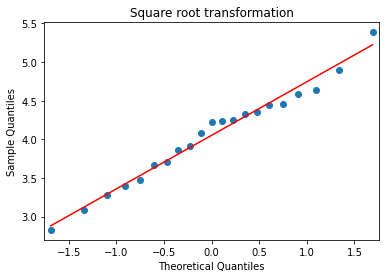

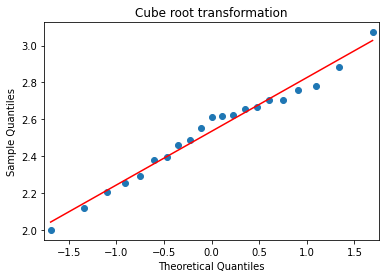

In [ ]:
sm.qqplot(df['deliverytime'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(df['deliverytime']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(df['deliverytime']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(df['deliverytime']), line = 'r')
plt.title('Cube root transformation')
plt.show()

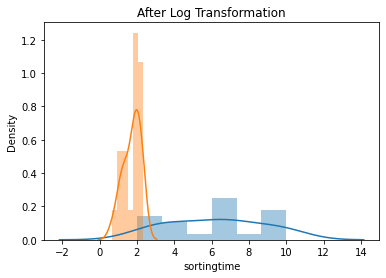

In [ ]:
sns.distplot(df['sortingtime'], bins = 6, kde = True)          #displot for showing edges & and getting two plot seperately
plt.title('Before Transformation')                             #distplot for not showing edges & and getting plot together
sns.distplot(np.log(df['sortingtime']), bins = 6, kde =True)
plt.title('After Log Transformation')
plt.show()

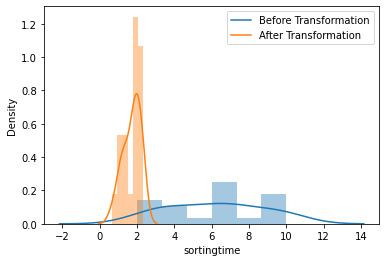

In [ ]:
sns.distplot(df['sortingtime'], bins = 6, kde = True) 
sns.distplot(np.log(df['sortingtime']), bins = 6, kde =True)
plt.legend(['Before Transformation', 'After Transformation'])

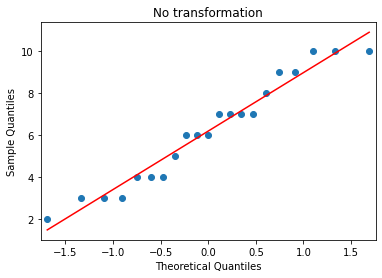

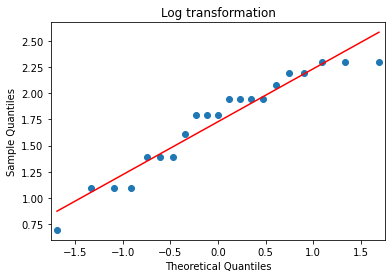

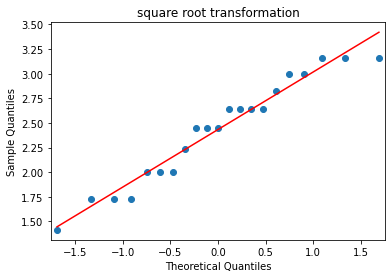

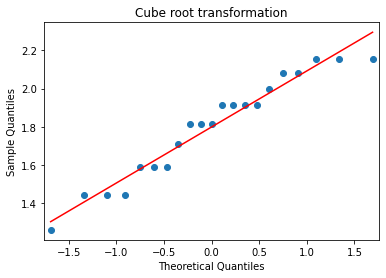

In [ ]:
sm.qqplot(df['sortingtime'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(df['sortingtime']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(df['sortingtime']), line = 'r')
plt.title('square root transformation')
sm.qqplot(np.cbrt(df['sortingtime']), line = 'r')
plt.title('Cube root transformation')
plt.show()

**Step 8 : Fitting a Linear Regression Model**

Using Ordinary least squares (OLS) regression

In [ ]:
model = smf.ols('deliverytime ~ sortingtime', data = df).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        10:35:17   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can notice in the above model


*   The R-squared and Adjusted R-squared scores are still below 0.85.

*   It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction
*   Lets Try some data transformation to check whether these scores can get any higher than this.


**Square Root transformation on data**

In [ ]:
square_root_model = smf.ols('np.sqrt(deliverytime) ~ np.sqrt(sortingtime)', data = df).fit()
square_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.sqrt(deliverytime)   R-squared:                       0.729
Model:                               OLS   Adj. R-squared:                  0.715
Method:                    Least Squares   F-statistic:                     51.16
Date:                   Sun, 12 Mar 2023   Prob (F-statistic):           8.48e-07
Time:                           10:35:17   Log-Likelihood:                -5.7320
No. Observations:                     21   AIC:                             15.46
Df Residuals:                         19   BIC:                             17.55
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sortingtime)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can notice in the above model



*   After Square Root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.
*   Lets Try other data transformation to check whether these scores can get any higher than this.



**Cube Root transformation on Data**

In [ ]:
cube_root_model = smf.ols('np.cbrt(deliverytime) ~ np.cbrt(sortingtime)', data = df).fit()
cube_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.cbrt(deliverytime)   R-squared:                       0.744
Model:                               OLS   Adj. R-squared:                  0.731
Method:                    Least Squares   F-statistic:                     55.25
Date:                   Sun, 12 Mar 2023   Prob (F-statistic):           4.90e-07
Time:                           10:35:17   Log-Likelihood:                 13.035
No. Observations:                     21   AIC:                            -22.07
Df Residuals:                         19   BIC:                            -19.98
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sortingtime)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can notice in the above model



*   After Cueb root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.
*   Lets Try other data transformation to check whether these scores can get any higher than this.



**Log transformation on Data**

In [ ]:
log_model = smf.ols('np.log(deliverytime) ~ np.log(sortingtime)', data = df).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(deliverytime)   R-squared:                       0.772
Model:                              OLS   Adj. R-squared:                  0.760
Method:                   Least Squares   F-statistic:                     64.39
Date:                  Sun, 12 Mar 2023   Prob (F-statistic):           1.60e-07
Time:                          10:35:17   Log-Likelihood:                 10.291
No. Observations:                    21   AIC:                            -16.58
Df Residuals:                        19   BIC:                            -14.49
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sortingtime)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can notice in the above model




*   After log transformation on the Data, This Model has scored the highest R-squared and Adjusted R-squared scores than the previous model
*   Yet both Adjusted R-squared and R-squared scores are still below 0.85 which is a thumb rule we consider for a good model for prediction.


*   Though it is now close to 0.8 which for a single feature/predictor variable or single independent variable is expected to be low. Hence , we can stop here.




**Model Testing**\
As Y = C + m*(X)

Finding Coefficient Parameters (m and c values)

In [ ]:
model.params

Intercept      6.582734
sortingtime    1.649020
dtype: float64

Here, (Intercept) **C value** = 6.58 & **m value** ((Sorting Time(X)) = 1.64\
Hypothesis testing of X variable by finding test_statistics and P_values for m\
i.e if (P_value < α=0.05 ; Reject Null)\
H0 : p- value of m = 0 (No Slope) \
H1 : p- value of m ≠ 0 (Some or significant Slope)

In [ ]:
print(model.tvalues,'\n',model.pvalues)

Intercept      3.823349
sortingtime    6.387447
dtype: float64 
 Intercept      0.001147
sortingtime    0.000004
dtype: float64


m value: tvalue=6.38, pvalue=0.000004\
As (pvalue=0)<(α=0.05); Reject Null hyp. \
Thus, X(Sorting Time) variable has good slope and variance w.r.t Y(Delivery Time) variable. (viz. sorting time affects delivery time)


**Step 8 : Residual Analysis**

Test for Normality of Residuals (Q-Q Plot)

line{None, “45”, “s”, “r”, “q”}
Options for the reference line to which the data is compared:

“45” - 45-degree line

“s” - standardized line, the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them

“r” - A regression line is fit

“q” - A line is fit through the quartiles.

None - by default no reference line is added to the plot.

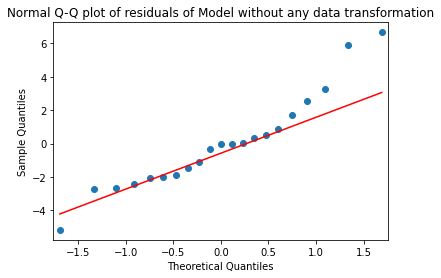

In [ ]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

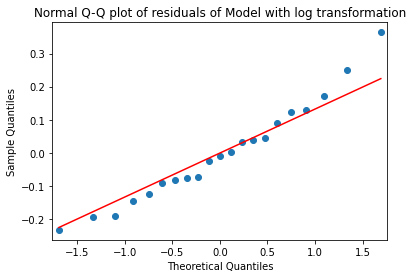

In [ ]:
import statsmodels.api as sm
sm.qqplot(log_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with log transformation')
plt.show()

As you can notice in the above plots




*   Both The Model have slightly different plots

*   The first model is right skewed and doesn't follow normal distribution
*   The second model after log-transformation follows normal distributon with less skewness than first model

**Residual Plot to check Homoscedasticity or Hetroscedasticity**

Homoscedasticity means the error is constant across the values of the dependent variable. The easiest way to check homoscedasticity is to make a scatterplot with the residuals against the dependent variable (or) by plotting residulas against fitted values. If a model violates homoscedasticity, it will exhibit heteroscedasticity

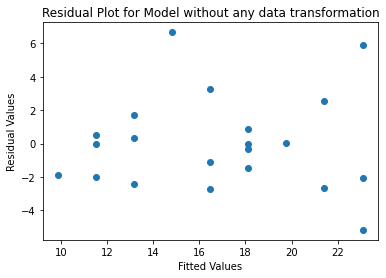

In [ ]:
plt.scatter(x = model.fittedvalues, y = model.resid)
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Fitted Values')
plt.ylabel('Residual Values')
plt.show()

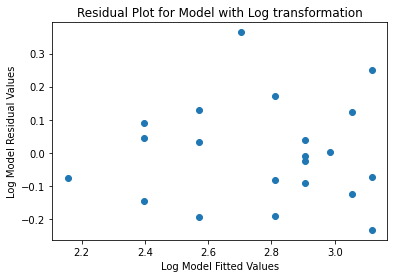

In [ ]:
plt.scatter(x = log_model.fittedvalues, y = log_model.resid)
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Log Model Fitted Values')
plt.ylabel('Log Model Residual Values')
plt.show()

As you can notice in the above plots


*   Both The Model have Homoscedasciticity.

*   The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.


*   Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed




**Step 10 : Model Validation**

**Comparing different models with respect to their Root Mean Squared Errors**

We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#we need to scale down all the models before calculating
#y_pred (deliverytime_pred) = model.predict(x(sortingtime))

sqr_root_y_pred = np.square (square_root_model.predict(df['sortingtime']))
cube_root_y_pred = np.power (cube_root_model.predict(df['sortingtime']),3)     #power is x^a, so for cube root, a is 3
log_model_y_pred = np.exp (log_model.predict(df['sortingtime']))               #to scale down log, we use exponential

In [ ]:
# mse = mean_squared_error(actual, predicted)  

square_root_model_mse = mean_squared_error(df['deliverytime'],sqr_root_y_pred)
cube_root_model_mse = mean_squared_error(df['deliverytime'],cube_root_y_pred)
log_model_mse = mean_squared_error(df['deliverytime'],log_model_y_pred)

In [ ]:
print('model_mse=', model.mse_resid,'\n'                        #mse_resid = Mean squared error of the residuals
      'square_root_model_mse=', square_root_model_mse,'\n' 
      'cube_root_model_mse=', cube_root_model_mse,'\n'
      'log_model_mse=', log_model_mse)


model_mse= 8.613660132645542 
square_root_model_mse= 7.6302696855687895 
cube_root_model_mse= 7.593244888931655 
log_model_mse= 7.5395763349751235


In [ ]:
# rmse = sq.rt of mse

model_rmse = np.sqrt (model.mse_resid)
square_root_model_rmse = np.sqrt (square_root_model_mse)
cube_root_model_rmse = np.sqrt (cube_root_model_mse)
log_model_rmse = np.sqrt (log_model_mse)                       

In [ ]:
print('model_rmse=', model_rmse,'\n'                                    
      'square_root_model_rmse=', square_root_model_rmse,'\n' 
      'cube_root_model_rmse=', cube_root_model_rmse,'\n'
      'log_model_rmse=', log_model_rmse)

model_rmse= 2.934903768890139 
square_root_model_rmse= 2.762294279320867 
cube_root_model_rmse= 2.755584309893576 
log_model_rmse= 2.745828897614548


✅ ***As log_model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use log_model to predict our values***

**Step 10 : Predicting values from Model with Log Transformation on the Data**

In [ ]:
y_pred = np.exp(log_model.predict(df['sortingtime']))
y_pred

0     22.597360
1     13.070123
2     16.653216
3     21.218593
4     22.597360
5     16.653216
6     18.259981
7     11.005911
8     22.597360
9     21.218593
10    19.776608
11    13.070123
12    18.259981
13    11.005911
14    11.005911
15    13.070123
16    16.653216
17    18.259981
18     8.637887
19    18.259981
20    14.934324
dtype: float64

In [ ]:
pd.DataFrame({
              'Sorting time': df['sortingtime'],
              'Delivery time': df['deliverytime'], 
              'Predicted delivery time' : y_pred
              })

,Sorting time,Delivery time,Predicted delivery time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593
